In [1]:
import numpy as np
import pandas as pd
import pickle
import os
import json
from sklearn.metrics import confusion_matrix as sklearn_cm
from scipy.special import softmax


In [2]:
from collections import Counter


In [3]:
def load_json(directory, filename):
    with open(os.path.join(directory, filename), 'r') as f:
        
        data = json.load(f)
    
    return data


In [4]:
def load_pickle(result_dir, filename):
    with open(os.path.join(result_dir, filename), 'rb') as f:
        data = pickle.load(f)
    
    return data

In [5]:
def calculate_balanced_accuracy(true_labels, predicted_labels, return_type='balanced_accuracy'):
    '''
    used particularly for this 3-classes classification task
    '''
    
    confusion_matrix = sklearn_cm(true_labels, predicted_labels)
    
    class0_recall = confusion_matrix[0,0]/np.sum(confusion_matrix[0])
    class1_recall = confusion_matrix[1,1]/np.sum(confusion_matrix[1])
    class2_recall = confusion_matrix[2,2]/np.sum(confusion_matrix[2])
    
    balanced_accuracy = (1/3)*class0_recall + (1/3)*class1_recall + (1/3)*class2_recall
    
    if return_type == 'all':
        return balanced_accuracy * 100, class0_recall * 100, class1_recall * 100, class2_recall * 100
    elif return_type == 'balanced_accuracy':
        return balanced_accuracy * 100
    else:
        raise NameError('Unsupported return_type in this calculate_balanced_accuracy fn')


### Get test patient study image grouping

In [6]:
StudyOrderInfo_dir = 'YOUR_PATH/ML_DATA/ViewClassifier/seed1/shared_test_this_seed/study_order_info'

study_order_list = load_json(StudyOrderInfo_dir, 'ForPatientTestSet_test_study_order_list.json')
studylevel_count_dicts = load_json(StudyOrderInfo_dir, 'ForPatientTestSet_test_study_level_count_dicts.json')


In [7]:
Simplified_study_order_list = []
for study in study_order_list:
    if study not in Simplified_study_order_list:
        Simplified_study_order_list.append(study)
        
Simplified_study_order_list

['2075458',
 '2960077',
 '2502128',
 '2753679',
 '2947216',
 '2528258',
 '790314',
 '786898_s2',
 '2471143',
 '2654833',
 '2736929',
 '2039332',
 '2961147',
 '1997795',
 '2796878',
 '2857581',
 '1268627',
 '2643302',
 '2696500',
 '2897903',
 '1867072',
 '2854483',
 '2228384',
 '2803476',
 '2501982',
 '1285763',
 '1320222',
 '2038999',
 '1966891',
 '2960153',
 '2912676',
 '1706176',
 '1625126',
 '2932015',
 '1626282',
 '1232679',
 '1321192',
 '2968758',
 '2932661',
 '2652786',
 '2853127',
 '2278451',
 '2921036',
 '3016995',
 '2148551',
 '1976168',
 '1528323',
 '2258485',
 '709867',
 '2932271',
 '2894038',
 '2923531',
 '1165710',
 '2913580',
 '1533248',
 '2958254',
 '2919769',
 '1108594',
 '2509426',
 '11241941',
 '2203942',
 '2153863',
 '2550465',
 '1857974',
 '1496159',
 '2479899',
 '2628061',
 '2125141',
 '2300141',
 '1804444',
 '2896093',
 '1805488',
 '1344968',
 '1691698',
 '1606929',
 '855076',
 '1001017',
 '2559243',
 '1643556',
 '2853552',
 '2583359',
 '2552233',
 '2873018',
 '24

In [8]:
num_studies = len(Simplified_study_order_list)
print('num_studies: {}'.format(num_studies))

Simplified_study_ImageCount_list = []
Simplified_study_DataIndicesRange_list = []

for study in Simplified_study_order_list:
    print('processing study: {}'.format(study))
    this_study_number_images = 0
    for diagnosis_label, counts in studylevel_count_dicts[study]['diagnosislabels_count'].items():
        print('diagnosis: {}, count: {}'.format(diagnosis_label, counts))
        this_study_number_images += counts
    
    
    assert this_study_number_images == Counter(study_order_list)[study]
        
    Simplified_study_ImageCount_list.append(this_study_number_images)
    print('\n')
    
Simplified_study_DataIndicesEndpoints_list = np.insert(np.cumsum(Simplified_study_ImageCount_list), 0, 0)
print('Simplified_study_DataIndicesEndpoints_list: {}'.format(Simplified_study_DataIndicesEndpoints_list))

for i in range(num_studies):
    Simplified_study_DataIndicesRange_list.append((Simplified_study_DataIndicesEndpoints_list[i], Simplified_study_DataIndicesEndpoints_list[i+1]))
        
print('Simplified_study_DataIndicesRange_list: {}'.format(Simplified_study_DataIndicesRange_list))
    

num_studies: 120
processing study: 2075458
diagnosis: no_AS, count: 80
diagnosis: mild_AS, count: 0
diagnosis: mildtomod_AS, count: 0
diagnosis: moderate_AS, count: 0
diagnosis: severe_AS, count: 0


processing study: 2960077
diagnosis: no_AS, count: 52
diagnosis: mild_AS, count: 0
diagnosis: mildtomod_AS, count: 0
diagnosis: moderate_AS, count: 0
diagnosis: severe_AS, count: 0


processing study: 2502128
diagnosis: no_AS, count: 61
diagnosis: mild_AS, count: 0
diagnosis: mildtomod_AS, count: 0
diagnosis: moderate_AS, count: 0
diagnosis: severe_AS, count: 0


processing study: 2753679
diagnosis: no_AS, count: 63
diagnosis: mild_AS, count: 0
diagnosis: mildtomod_AS, count: 0
diagnosis: moderate_AS, count: 0
diagnosis: severe_AS, count: 0


processing study: 2947216
diagnosis: no_AS, count: 79
diagnosis: mild_AS, count: 0
diagnosis: mildtomod_AS, count: 0
diagnosis: moderate_AS, count: 0
diagnosis: severe_AS, count: 0


processing study: 2528258
diagnosis: no_AS, count: 99
diagnosis: mil

In [9]:
Counter(study_order_list)

Counter({'2075458': 80,
         '2960077': 52,
         '2502128': 61,
         '2753679': 63,
         '2947216': 79,
         '2528258': 99,
         '790314': 67,
         '786898_s2': 96,
         '2471143': 104,
         '2654833': 48,
         '2736929': 93,
         '2039332': 59,
         '2961147': 28,
         '1997795': 51,
         '2796878': 76,
         '2857581': 62,
         '1268627': 58,
         '2643302': 74,
         '2696500': 37,
         '2897903': 74,
         '1867072': 46,
         '2854483': 44,
         '2228384': 85,
         '2803476': 64,
         '2501982': 68,
         '1285763': 82,
         '1320222': 63,
         '2038999': 72,
         '1966891': 82,
         '2960153': 66,
         '2912676': 128,
         '1706176': 56,
         '1625126': 68,
         '2932015': 71,
         '1626282': 72,
         '1232679': 71,
         '1321192': 59,
         '2968758': 67,
         '2932661': 75,
         '2652786': 77,
         '2853127': 85,
         '227

### Perform study level integration

### FS + MU

In [10]:
candidate_view_dirs = [

    'PATH_TO_THE_MODEL'
    
]



candidate_diagnosis_dirs = [
    'PATH_TO_THE_MODEL/ForPatientTestSet_diagnosis_predictions/ema'
]


In [11]:
checkpoint_combination_list = []
SimpleAveraging_BalancedAccuracy_list = []
ConfidenceBased_PrioritizedView_BalancedAccuracy_list = []
SimpleAveraging_predictions_list = []
ConfidencedBased_PrioritizedView_predictions_list = []

studies_relevance_list = []

# candidate_view_dirs = [i for i in os.listdir(candidate_view_rootdir) if '.ipynb_checkpoints' not in i]

for candidate_view_dir in candidate_view_dirs:
    candidate_view = os.path.join(candidate_view_dir, 'ForPatientTestSet_predictions/ema')
    if not os.path.exists(os.path.join(candidate_view,'test_predictions.pkl')):
        continue
            
    View_predictions = load_pickle(candidate_view, 'test_predictions.pkl')
    
    for candidate_diagnosis in candidate_diagnosis_dirs:

        Diagnosis_predictions = load_pickle(candidate_diagnosis, 'test_predictions.pkl')

        #perform integration
        Diagnosis_true_labels = Diagnosis_predictions['true_labels']
        View_true_labels = View_predictions['true_labels']

        Diagnosis_predictions_values = Diagnosis_predictions['ema_predictions']
#         Diagnosis_predictions_values = softmax(Diagnosis_predictions_values, axis=1)
        
        View_predictions_values = View_predictions['ema_predictions']
#         View_predictions_values = softmax(View_predictions_values, axis=1)
        
        
        SimpleAveraging_predicted_labels = []
        SimpleAveraging_predictions = []

        ConfidencedBased_PrioritizedView_predicted_labels = []
        ConfidencedBased_PrioritizedView_predictions = []

        study_true_diagnosis_labels = []
        
        for idx, study in enumerate(Simplified_study_order_list):
#             print('Currently aggregating predictions for {}'.format(study).center(100, '-'))
            this_study_data_indices = list(range(Simplified_study_DataIndicesRange_list[idx][0], Simplified_study_DataIndicesRange_list[idx][1]))


            this_study_diagnosis_true_labels = Diagnosis_true_labels[this_study_data_indices]
            assert len(list(set(this_study_diagnosis_true_labels))) == 1, '1 study can only have 1 diagnosis label'
            this_study_diagnosis_single_label = this_study_diagnosis_true_labels[0]
            study_true_diagnosis_labels.append(this_study_diagnosis_single_label)

            this_study_diagnosis_predictions = Diagnosis_predictions_values[this_study_data_indices]
            this_study_view_predictions = View_predictions_values[this_study_data_indices]
            this_study_view_true_labels = View_true_labels[this_study_data_indices]
#                 print('this_study_diagnosis_predictions: {}'.format(this_study_diagnosis_predictions.shape))
#                 print('this_study_view_predictions: {}'.format(this_study_view_predictions.shape))

            #SimpleAveraging:
            this_study_SimpleAveraging_prediction = np.mean(this_study_diagnosis_predictions, axis = 0) #a 1x3 vector
#                 print('this_study_SimpleAveraging_prediction: {}'.format(this_study_SimpleAveraging_prediction))
            this_study_SimpleAveraging_predicted_label = np.argmax(this_study_SimpleAveraging_prediction)
#                 print('true_diagnosis:{}, SimpleAverage predicted_diagnosis:{}\n'.format(this_study_diagnosis_single_label, this_study_SimpleAveraging_predicted_label))

            #record this patient's SimpleAveraging predictions and predicted labels
            SimpleAveraging_predictions.append(this_study_SimpleAveraging_prediction)
            SimpleAveraging_predicted_labels.append(this_study_SimpleAveraging_predicted_label)


            #ConfidenceBased_PrioritizedView
        #     print('this_study_view_predictions[:,:2] shape: {}'.format(this_study_view_predictions[:,:2].shape))
            this_study_ViewRelevance =  np.sum(this_study_view_predictions[:,:2], axis=1)
#                 print('this_study_ViewRelevance: {}, this_study_view_true_labels: {}'.format(this_study_ViewRelevance,this_study_view_true_labels))
            studies_relevance_list.append(this_study_ViewRelevance)
            
        #     print('this_study_diagnosis_predictions * this_study_ViewRelevance[:, np.newaxis] shape:{}'.format((this_study_diagnosis_predictions * this_study_ViewRelevance[:, np.newaxis]).shape))
            this_study_DiagnosisPrediction_with_ViewRelevance = np.mean(this_study_diagnosis_predictions * this_study_ViewRelevance[:, np.newaxis], axis=0)
#                 print('this_study_DiagnosisPrediction_with_ViewRelevance: {}'.format(this_study_DiagnosisPrediction_with_ViewRelevance))

            this_study_DiagnosisPredictedLabel_with_ViewRelevance = np.argmax(this_study_DiagnosisPrediction_with_ViewRelevance)

            #record this patient's ConfidenceBased_PrioritizedView predictions and predicted labels
            ConfidencedBased_PrioritizedView_predictions.append(this_study_DiagnosisPrediction_with_ViewRelevance)
            ConfidencedBased_PrioritizedView_predicted_labels.append(this_study_DiagnosisPredictedLabel_with_ViewRelevance)
#                 print('true_diagnosis:{}, ConfidenceBased_PrioritizedView predicted_diagnosis:{}\n'.format(this_study_diagnosis_single_label, this_study_DiagnosisPredictedLabel_with_ViewRelevance))

        SimpleAveraging_predictions = np.array(SimpleAveraging_predictions)
        ConfidencedBased_PrioritizedView_predictions = np.array(ConfidencedBased_PrioritizedView_predictions)
    
#                 print('\n\n')
        SimpleAveraging_balanced_accuracy = calculate_balanced_accuracy(study_true_diagnosis_labels, SimpleAveraging_predicted_labels)
        ConfidenceBased_PrioritizedView_balanced_accuracy = calculate_balanced_accuracy(study_true_diagnosis_labels, ConfidencedBased_PrioritizedView_predicted_labels)
        print('view: {}, diagnosis: {}'.format(candidate_view, candidate_diagnosis))
        print('SimpleAveraging_balanced_accuracy: {}'.format(SimpleAveraging_balanced_accuracy))
        print('ConfidenceBased_PrioritizedView_balanced_accuracy: {}\n\n'.format(ConfidenceBased_PrioritizedView_balanced_accuracy))
        
        #records
        checkpoint_combination_list.append((candidate_view, candidate_diagnosis))
        SimpleAveraging_BalancedAccuracy_list.append(SimpleAveraging_balanced_accuracy)
        ConfidenceBased_PrioritizedView_BalancedAccuracy_list.append(ConfidenceBased_PrioritizedView_balanced_accuracy)
        SimpleAveraging_predictions_list.append(SimpleAveraging_predictions)
        ConfidencedBased_PrioritizedView_predictions_list.append(ConfidencedBased_PrioritizedView_predictions)
#                 
checkpoint_combination_list = np.array(checkpoint_combination_list)
SimpleAveraging_BalancedAccuracy_list = np.array(SimpleAveraging_BalancedAccuracy_list)
ConfidenceBased_PrioritizedView_BalancedAccuracy_list = np.array(ConfidenceBased_PrioritizedView_BalancedAccuracy_list)
SimpleAveraging_predictions_list = np.array(SimpleAveraging_predictions_list)
ConfidencedBased_PrioritizedView_predictions_list = np.array(ConfidencedBased_PrioritizedView_predictions_list)
study_true_diagnosis_labels = np.array(study_true_diagnosis_labels)


view: /cluster/tufts/hugheslab/zhuang12/Echo_ClinicalManualScript_1112/experiments/ViewClassifier/seed1/DEV56/echo/FSBaseline_A2C_batch21_A4C_batch30_PLAX_PSAX_upweight_factor5_PLAX_batch43_PSAX_batch14_UsefulUnlabeled_batch30_archresnet_class_weights1.11,3.42,1.60,2.28,1.60_dropout_rate0.4_ema0.999_filters32_lr0.002_nclass5_repeat4_scales4_smoothing0.001_wd0.002/ForPatientTestSet_predictions/ema, diagnosis: /cluster/tufts/hugheslab/zhuang12/Echo_ClinicalManualScript_1112/experiments/MultitaskClassifier/Baseline4/seed1/DEV56/echo/PLAX_PSAX_upweight_factor1_auxiliary_task_weight3.0_batch120_diagnosis_class_weights0.577,0.352,0.070_diagnosis_nclass3_dropout_rate0.0_ema0.999_filters32_lr0.002_repeat4_scales4_view_class_weights0.107,0.341,0.195,0.272,0.085_view_nclass5_wd0.002/ForPatientTestSet_diagnosis_predictions/ema
SimpleAveraging_balanced_accuracy: 34.31372549019608
ConfidenceBased_PrioritizedView_balanced_accuracy: 39.914529914529915




In [12]:
print('checkpoint_combination_list shape: {}'.format(checkpoint_combination_list.shape))
print('SimpleAveraging_BalancedAccuracy_list shape: {}'.format(SimpleAveraging_BalancedAccuracy_list.shape))
print('ConfidenceBased_PrioritizedView_BalancedAccuracy_list shape: {}'.format(ConfidenceBased_PrioritizedView_BalancedAccuracy_list.shape))
print('SimpleAveraging_predictions_list shape: {}'.format(SimpleAveraging_predictions_list.shape))
print('ConfidencedBased_PrioritizedView_predictions_list shape: {}'.format(ConfidencedBased_PrioritizedView_predictions_list.shape))
print('study_true_diagnosis_labels shape: {}'.format(study_true_diagnosis_labels.shape))


checkpoint_combination_list shape: (1, 2)
SimpleAveraging_BalancedAccuracy_list shape: (1,)
ConfidenceBased_PrioritizedView_BalancedAccuracy_list shape: (1,)
SimpleAveraging_predictions_list shape: (1, 120, 3)
ConfidencedBased_PrioritizedView_predictions_list shape: (1, 120, 3)
study_true_diagnosis_labels shape: (120,)


### AUC analysis:

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)


#### Priority1:  noAS vs (earlyAS+SignificantAS)

In [14]:
def noASvsEarlySignificantAS(predictions, true_labels):
    
    normalized_true_labels = [0 if i == 0 else 1 for i in true_labels]
    
    print('original predictions is {}, shape {}'.format(predictions, predictions.shape))
    normalized_predictions = np.concatenate((predictions[:,0][:,np.newaxis], np.sum(predictions[:,1:], axis=1)[:,np.newaxis]), axis=1)
    print('normalized predictions is {}, shape {}'.format(normalized_predictions, normalized_predictions.shape))
    
    normalized_predictions = normalized_predictions/np.sum(normalized_predictions, axis=1, keepdims=True)
    print('original predictions is {}, shape {}'.format(predictions, predictions.shape))
    
    fpr, tpr, thresholds = roc_curve(normalized_true_labels, normalized_predictions[:,1])
    auc = round(roc_auc_score(normalized_true_labels, normalized_predictions[:,1]), 3)
    
    return fpr, tpr, thresholds, auc


original predictions is [[0.13086839 0.18252379 0.6866078 ]
 [0.17051809 0.04606522 0.7834165 ]
 [0.13490564 0.15685494 0.7082393 ]
 [0.21454538 0.24997474 0.5354799 ]
 [0.19564527 0.2152571  0.58909774]
 [0.1552493  0.22725123 0.61749935]
 [0.08710466 0.09488926 0.81800616]
 [0.02580188 0.07769743 0.8965008 ]
 [0.13071708 0.13643846 0.73284435]
 [0.19294496 0.20058323 0.6064718 ]
 [0.17556709 0.18705025 0.6373826 ]
 [0.11144502 0.05908642 0.8294685 ]
 [0.01548987 0.15780433 0.82670593]
 [0.1603677  0.18500991 0.6546224 ]
 [0.10778981 0.08826896 0.80394137]
 [0.13552374 0.10374919 0.760727  ]
 [0.14704913 0.12768933 0.7252616 ]
 [0.01242507 0.41920453 0.5683704 ]
 [0.01017098 0.23852634 0.7513026 ]
 [0.145451   0.20759682 0.64695203]
 [0.08965728 0.15201904 0.7583236 ]
 [0.14532903 0.11450518 0.74016577]
 [0.03930237 0.5804571  0.3802405 ]
 [0.22331902 0.05321391 0.72346723]
 [0.09825806 0.08509797 0.81664395]
 [0.02735121 0.05043408 0.9222147 ]
 [0.11344717 0.04222569 0.8443271 ]
 [0.

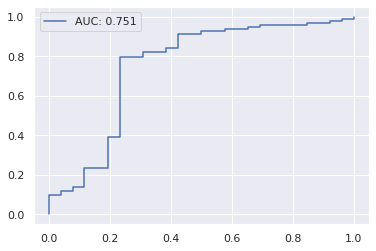

In [16]:
fpr, tpr, thresholds, auc = noASvsEarlySignificantAS(SimpleAveraging_predictions_list[0], study_true_diagnosis_labels)
plt.plot(fpr, tpr, label='AUC: {}'.format(auc))

plt.legend()
plt.show()
    

#### Priority2: earlyAS vs SignificantAS

In [17]:
def EarlyASvsSignificantAS(predictions, true_labels):
    
    to_keep_mask = true_labels != 0
    
    true_labels = true_labels[to_keep_mask]
    predictions = predictions[to_keep_mask]
    
    normalized_true_labels = [0 if i == 1 else 1 for i in true_labels]
    
    normalized_predictions = np.concatenate((predictions[:,1][:,np.newaxis], predictions[:,2][:,np.newaxis]), axis=1)
    normalized_predictions = normalized_predictions/np.sum(normalized_predictions, axis=1, keepdims=True)
    
    fpr, tpr, thresholds = roc_curve(normalized_true_labels, normalized_predictions[:,1])
    auc = round(roc_auc_score(normalized_true_labels, normalized_predictions[:,1]), 3)
    
    return fpr, tpr, thresholds, auc


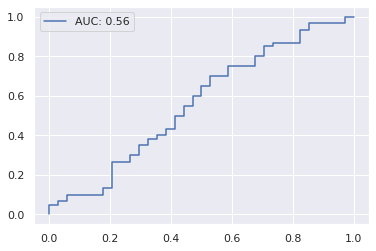

In [19]:
fpr, tpr, thresholds, auc = EarlyASvsSignificantAS(SimpleAveraging_predictions_list[0], study_true_diagnosis_labels)
plt.plot(fpr, tpr, label='AUC: {}'.format(auc))

plt.legend()
plt.show()
    

#### Others to look at: 

##### noAS vs earlyAS

In [20]:
def NoASvsEarlyAS(predictions, true_labels):
    
    to_keep_mask = true_labels != 2
    
    true_labels = true_labels[to_keep_mask]
    predictions = predictions[to_keep_mask]
    
    normalized_true_labels = [0 if i == 0 else 1 for i in true_labels]
    
    normalized_predictions = np.concatenate((predictions[:,0][:,np.newaxis], predictions[:,1][:,np.newaxis]), axis=1)
    normalized_predictions = normalized_predictions/np.sum(normalized_predictions, axis=1, keepdims=True)
    
    fpr, tpr, thresholds = roc_curve(normalized_true_labels, normalized_predictions[:,1])
    auc = round(roc_auc_score(normalized_true_labels, normalized_predictions[:,1]), 3)
    
    return fpr, tpr, thresholds, auc

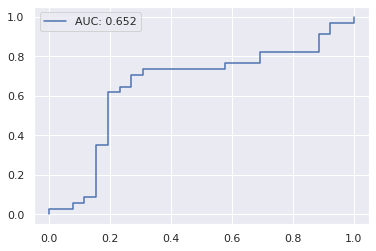

In [22]:
fpr, tpr, thresholds, auc = NoASvsEarlyAS(SimpleAveraging_predictions_list[0], study_true_diagnosis_labels)
plt.plot(fpr, tpr, label='AUC: {}'.format(auc))

plt.legend()
plt.show()
    

##### (noAS + earlyAS) vs SignificantAS

In [23]:
def NoEarlyASvsSignificantAS(predictions, true_labels):
    
    normalized_true_labels = [1 if i == 2 else 0 for i in true_labels]
    
    normalized_predictions = np.concatenate((np.sum(predictions[:,:1], axis=1)[:,np.newaxis], predictions[:,2][:,np.newaxis]), axis=1)
    normalized_predictions = normalized_predictions/np.sum(normalized_predictions, axis=1, keepdims=True)
    
    fpr, tpr, thresholds = roc_curve(normalized_true_labels, normalized_predictions[:,1])
    auc = round(roc_auc_score(normalized_true_labels, normalized_predictions[:,1]), 3)
    
    return fpr, tpr, thresholds, auc


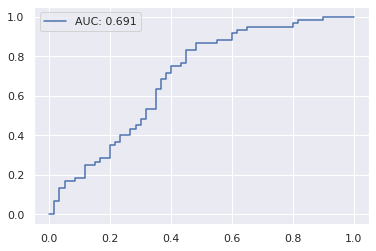

In [25]:
fpr, tpr, thresholds, auc = NoEarlyASvsSignificantAS(SimpleAveraging_predictions_list[0], study_true_diagnosis_labels)
plt.plot(fpr, tpr, label='AUC: {}'.format(auc))

plt.legend()
plt.show()
    

### Confusion Matrix

In [26]:
def plot_confusion_matrix(data, labels, output_filename, fontsize=20, normalized_option = None):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    print('Inside plot_confusion_matrix, data is {}'.format(data), flush = True)
    sns.set(color_codes=True)
    plt.figure(1, figsize=(10, 10))
 
#     plt.title("Confusion Matrix")
    
    sns.set(font_scale=1.2)
    if normalized_option == 'Recall':
        data = data.astype(np.float16)
        data[0] = data[0]/np.sum(data[0])
        data[1] = data[1]/np.sum(data[1])
        data[2] = data[2]/np.sum(data[2])
        ax = sns.heatmap(data, annot=True, 
            fmt='.01%', cmap='Blues', annot_kws={"size": fontsize}, cbar=False)
    
        
    elif normalized_option == 'Error':
        data = data.astype(np.float16)
        np.fill_diagonal(data, 0)
        data = data/np.sum(data)
        ax = sns.heatmap(data, annot=True, 
            fmt='.01%', cmap='Blues', annot_kws={"size": fontsize}, cbar=False)
 
    else:
        ax = sns.heatmap(data, annot=True, 
            fmt='d', cmap='Blues', annot_kws={"size": fontsize}, cbar=False)
    
    #ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, annot_kws={'size':16})
    
    ax.set_xticklabels(labels, fontsize=31)
    ax.set_yticklabels(labels, fontsize=31, verticalalignment='center')
 
    ax.set_xlabel('Predicted Label', fontsize=33)
    ax.set_ylabel('True Label', fontsize=33)
#     ax.set(ylabel="True Label", xlabel="Predicted Label")
    ax.set_ylim([3, 0])

#     plt.savefig(output_filename, bbox_inches='tight', dpi=300)
#     plt.savefig(output_filename, bbox_inches='tight')

    plt.show()
    plt.close()

In [27]:
study_true_diagnosis_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
SimpleAveraging_predictions_list[0]

array([[0.13086839, 0.18252379, 0.6866078 ],
       [0.17051809, 0.04606522, 0.7834165 ],
       [0.13490564, 0.15685494, 0.7082393 ],
       [0.21454538, 0.24997474, 0.5354799 ],
       [0.19564527, 0.2152571 , 0.58909774],
       [0.1552493 , 0.22725123, 0.61749935],
       [0.08710466, 0.09488926, 0.81800616],
       [0.02580188, 0.07769743, 0.8965008 ],
       [0.13071708, 0.13643846, 0.73284435],
       [0.19294496, 0.20058323, 0.6064718 ],
       [0.17556709, 0.18705025, 0.6373826 ],
       [0.11144502, 0.05908642, 0.8294685 ],
       [0.01548987, 0.15780433, 0.82670593],
       [0.1603677 , 0.18500991, 0.6546224 ],
       [0.10778981, 0.08826896, 0.80394137],
       [0.13552374, 0.10374919, 0.760727  ],
       [0.14704913, 0.12768933, 0.7252616 ],
       [0.01242507, 0.41920453, 0.5683704 ],
       [0.01017098, 0.23852634, 0.7513026 ],
       [0.145451  , 0.20759682, 0.64695203],
       [0.08965728, 0.15201904, 0.7583236 ],
       [0.14532903, 0.11450518, 0.74016577],
       [0.

### Simple average

In [29]:
simple_average_cm = sklearn_cm(study_true_diagnosis_labels, SimpleAveraging_predictions_list[0].argmax(1))
simple_average_cm

array([[ 0,  1, 25],
       [ 0,  1, 33],
       [ 0,  0, 60]])

Inside plot_confusion_matrix, data is [[ 0  1 25]
 [ 0  1 33]
 [ 0  0 60]]


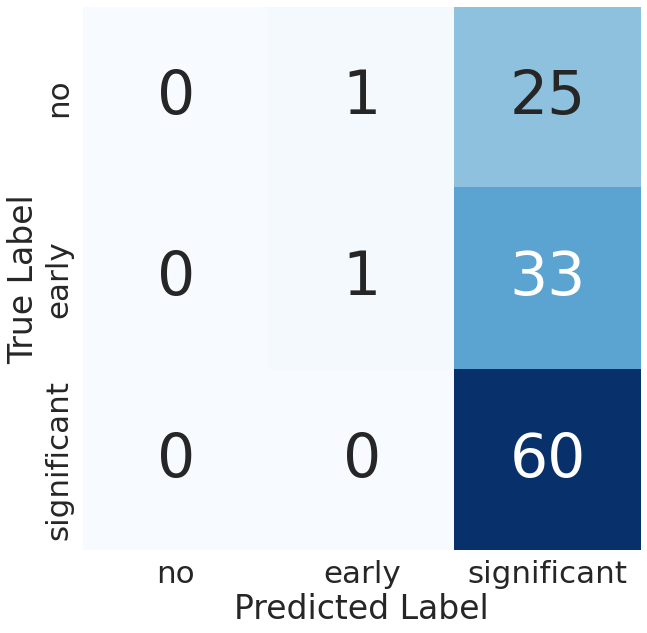

In [30]:
confusion_matrix_label = ['no', 'early', 'significant']
confusion_matrix_save_path = 'None'

plot_confusion_matrix(simple_average_cm, confusion_matrix_label, confusion_matrix_save_path, 60, normalized_option = None)
